In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
df=pd.read_csv("historical_automobile_sales.csv")
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


Q 1: Develop a Line chart using the functionality of pandas to show how
automobile sales fluctuate from year to year. 


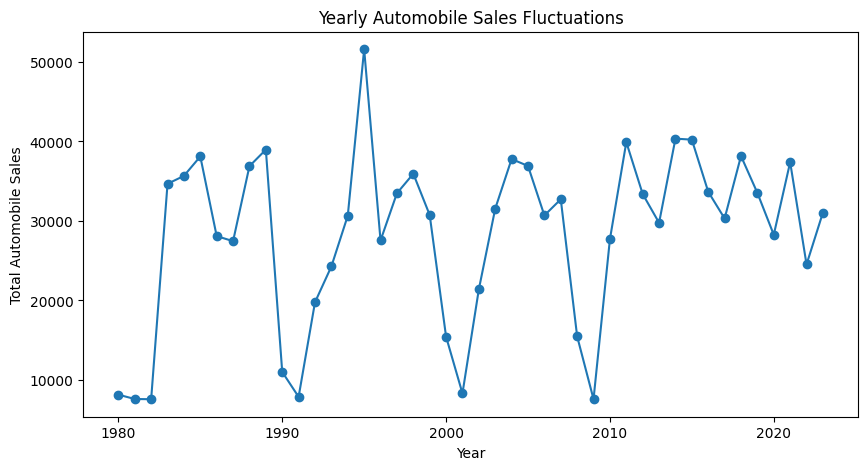

In [11]:
df = df.groupby("Year")["Automobile_Sales"].sum()
plt.figure(figsize=(10, 5))
plt.plot(df.index, df.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Total Automobile Sales")
plt.title("Yearly Automobile Sales Fluctuations")
plt.show()


Q 2: Plot different lines for categories of vehicle type and analyze the trend
to answer the question Is there a noticeable difference in sales trends
between different vehicle types during recession periods? 

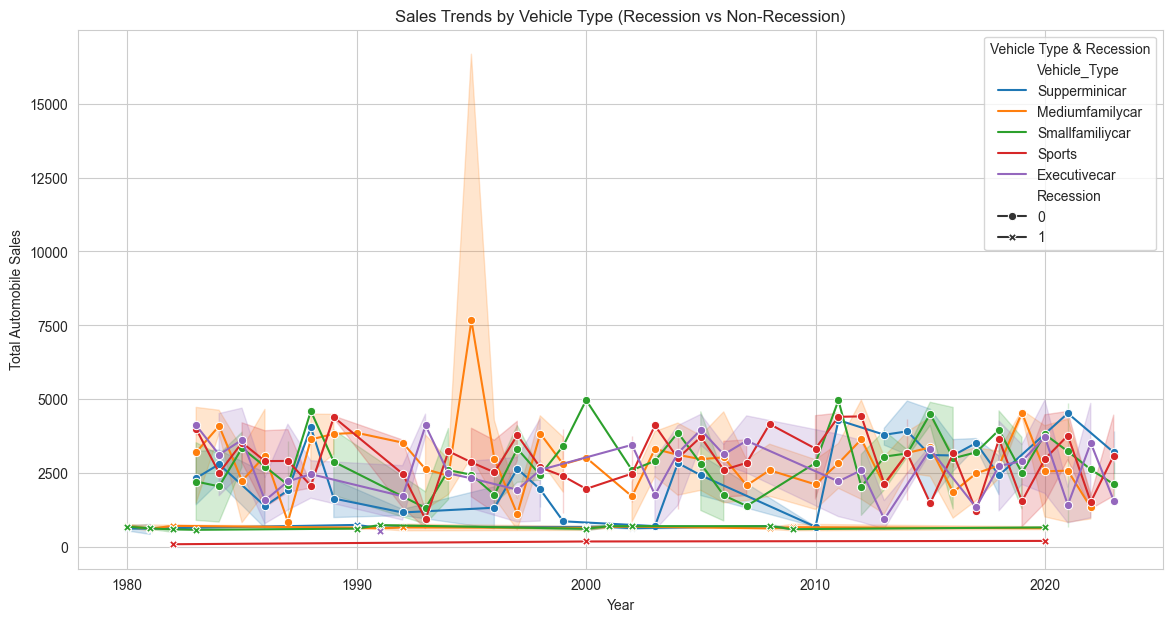

In [32]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x="Year", y="Automobile_Sales", hue="Vehicle_Type", style="Recession", markers=True, dashes=False)
plt.xlabel("Year")
plt.ylabel("Total Automobile Sales")
plt.title("Sales Trends by Vehicle Type (Recession vs Non-Recession)")
plt.legend(title="Vehicle Type & Recession")
plt.show()

Q 3: Use the functionality of Seaborn Library to create a visualization to compare
the sales trend per vehicle type for a recession period with a non- recession
period.

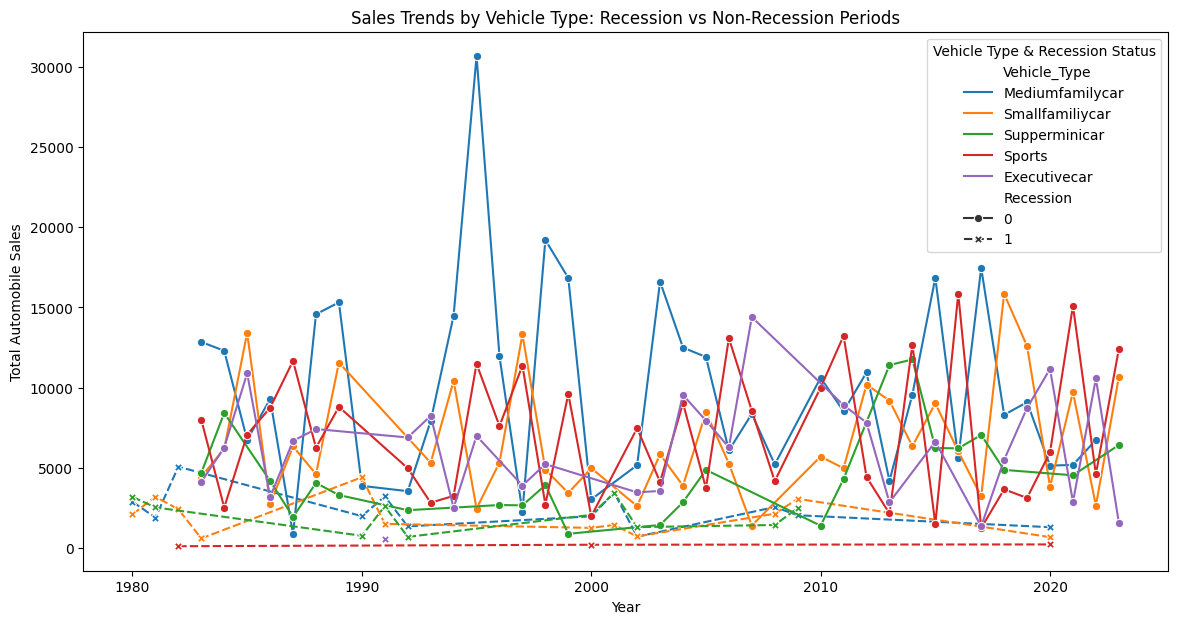

In [27]:
sales_by_type_recession = df.groupby(["Year", "Vehicle_Type", "Recession"])["Automobile_Sales"].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_by_type_recession, x="Year", y="Automobile_Sales", hue="Vehicle_Type", style="Recession", markers=True, dashes=True)
plt.xlabel("Year")
plt.ylabel("Total Automobile Sales")
plt.title("Sales Trends by Vehicle Type: Recession vs Non-Recession Periods")
plt.legend(title="Vehicle Type & Recession Status")
plt.show()

Q 4: Now you want to compare the sales of different vehicle types
during a recession and a non-recession period 

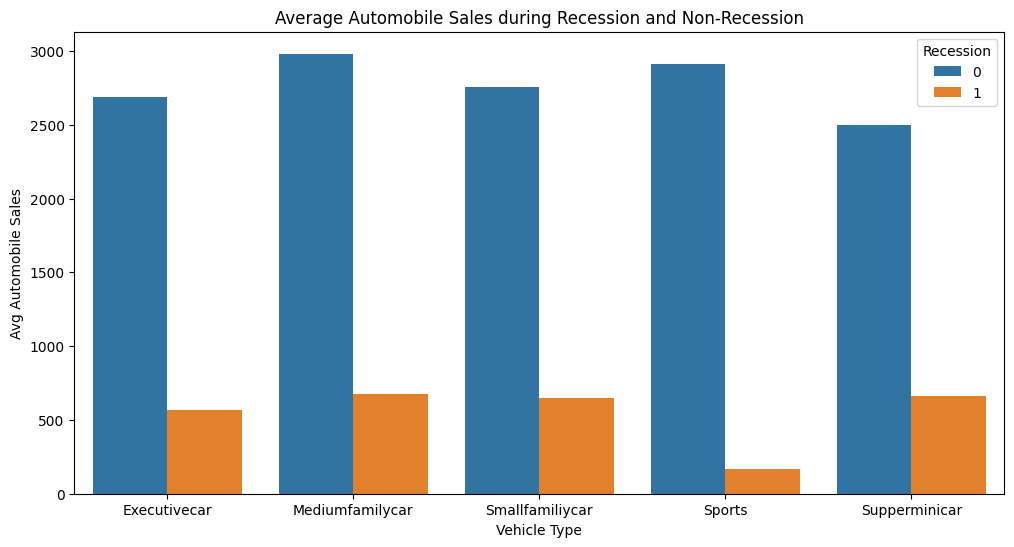

In [29]:
sales_comparison = df.groupby(["Recession", "Vehicle_Type"])["Automobile_Sales"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="Vehicle_Type", y="Automobile_Sales", hue="Recession", data=sales_comparison)

plt.xlabel("Vehicle Type")
plt.ylabel("Avg Automobile Sales")
plt.title("Average Automobile Sales during Recession and Non-Recession")
plt.legend(title="Recession", loc="upper right")
plt.show()